# Application of Bootstrap samples in Random Forest

In [79]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

 <li> Load the boston house dataset </li>

In [80]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [81]:
x.shape

(506, 13)

### Task: 1
<font color='red'><b>Step 1 Creating samples: </b></font> Randomly create 30 samples from the whole boston data points.
<ol>
<li>Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points</li>
<li>Ex: For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly consider we have selected [4, 5, 7, 8, 9, 3] now we will replciate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]</li>
<li> we create 30 samples like this </li>
<li> Note that as a part of the Bagging when you are taking the random samples make sure each of the sample will have                different set of columns</li>
<li> Ex: assume we have 10 columns for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample [7, 9, 1, 4, 5, 6, 2] and so on...</li>
<li> Make sure each sample will have atleast 3 feautres/columns/attributes</li>
</ol>

<font color='red'><b>Step 2 Building High Variance Models on each of the sample and finding train MSE value:</b></font> Build a DecisionTreeRegressor on each of the sample.
<ol><li>Build a regression trees on each of 30 samples.</li>
<li>computed the predicted values of each data point(506 data points) in your corpus.</li>
<li> predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.</li>
<li>Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.</li>
</ol>

<font color='red'><b>Step 3 Calculating the OOB score :</b></font>
<ol>
<li>Computed the predicted values of each data point(506 data points) in your corpus.</li>
<li>Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.</li>
<li>Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.</li>
</ol>

### Task: 2
<pre>
<font color='red'><b>Computing CI of OOB Score and Train MSE</b></font>
<ol>
<li> Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>
</pre>
### Task: 3
<pre>
<font color='red'><b>Given a single query point predict the price of house.</b></font>

<li>Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] Predict the house price for this point as mentioned in the step 2 of Task 1. </li>
</pre>

In [82]:
import random 

row_indices_iob = []
row_indices_oob = []
col_indices     = []

for i in range(30):
    iob_indices = np.random.choice(range(506),303)
    iob_indices = np.hstack([iob_indices,np.random.choice(iob_indices,size=203)])
    col_index = np.array(random.sample(range(13),random.randint(3,13)))
    row_indices_iob.append(iob_indices) 
    col_indices.append(col_index)
    oob_indices = np.setdiff1d(range(506),iob_indices)
    row_indices_oob.append(oob_indices)
print(row_indices_iob[29].shape)
print(row_indices_oob[29].shape)
print(col_indices[29].shape)

(506,)
(277,)
(11,)


In [83]:
from sklearn.tree import DecisionTreeRegressor
Y_pred = [0 for i in range(506)]
for i in range(30):
    clf = DecisionTreeRegressor()
    X_train = x[row_indices_iob[i][:,None],col_indices[i]]
    Y_train = y[row_indices_iob[i]]
    clf.fit(X_train,Y_train)
    Y_pred += clf.predict(x[:,col_indices[i]])
Y_pred = Y_pred/30

errors = (y-Y_pred)**2
MSE = errors.sum()/506
print(MSE)

4.148524204957465


In [84]:
Y_pred_OOB = [0 for i in range(506)]
Ks = [0 for i in range(506)]

for i in range(30):
    k = 0
    clf = DecisionTreeRegressor()
    X_train = x[row_indices_iob[i][:,None],col_indices[i]]
    Y_train = y[row_indices_iob[i]]
    clf.fit(X_train,Y_train)

    for j in range(506):
        if j not in row_indices_iob[i]:
            Ks[j] += 1
            Y_pred_OOB[k] += clf.predict(x[j,col_indices[i]].reshape(1,-1)).item()
        k += 1
        
Y_pred_OOB = [x/y for x,y in zip(Y_pred_OOB,Ks)]

errors_OOB = (y-Y_pred_OOB)**2
OOB = errors_OOB.sum()/506
print(OOB)

13.165122999441879


In [85]:
MSEs = []
OOBs = []
for _ in range(35):
    row_indices_iob = []
    row_indices_oob = []
    col_indices     = []

    for i in range(30):
        iob_indices = np.random.choice(range(506),303)
        iob_indices = np.hstack([iob_indices,np.random.choice(iob_indices,size=203)])
        col_index = np.array(random.sample(range(13),random.randint(3,13)))
        row_indices_iob.append(iob_indices) 
        col_indices.append(col_index)
        oob_indices = np.setdiff1d(range(506),iob_indices)
        row_indices_oob.append(oob_indices)
    
    Y_pred = [0 for i in range(506)]
    for i in range(30):
        clf = DecisionTreeRegressor()
        X_train = x[row_indices_iob[i][:,None],col_indices[i]]
        Y_train = y[row_indices_iob[i]]
        clf.fit(X_train,Y_train)
        Y_pred += clf.predict(x[:,col_indices[i]])
    Y_pred = Y_pred/30

    errors = (y-Y_pred)**2
    MSE = errors.sum()/506
    MSEs.append(MSE)
    
    Y_pred_OOB = [0 for i in range(506)]
    Ks = [0 for i in range(506)]

    for i in range(30):
        k = 0
        clf = DecisionTreeRegressor()
        X_train = x[row_indices_iob[i][:,None],col_indices[i]]
        Y_train = y[row_indices_iob[i]]
        clf.fit(X_train,Y_train)

        for j in range(506):
            if j not in row_indices_iob[i]:
                Ks[j] += 1
                Y_pred_OOB[k] += clf.predict(x[j,col_indices[i]].reshape(1,-1)).item()
            k += 1

    Y_pred_OOB = [x/y for x,y in zip(Y_pred_OOB,Ks)]

    errors_OOB = (y-Y_pred_OOB)**2
    OOB = errors_OOB.sum()/506
    OOBs.append(OOB)
    
print(MSEs)
print('='*120)
print(OOBs)

[4.118956748231545, 4.075369335903633, 5.033221878588019, 4.063964643362632, 5.351247126446244, 3.933621810908963, 4.279573644683178, 3.925516510123594, 4.340600935396307, 3.9072713629042846, 4.302113404388021, 4.455355902314506, 4.261866465703848, 3.8867571022857224, 3.9846047130702673, 4.470595588846469, 4.6696351251322215, 3.9953873323986047, 4.341209356051573, 3.9048308662639415, 4.577309714736203, 3.804574815396493, 5.417430372207078, 3.5540478758141356, 3.9609243601252357, 4.280395993011057, 3.9305223254007475, 4.530276668065598, 4.383725305476349, 4.26334498006185, 3.973298708250302, 4.132456744071148, 4.819316869097935, 4.827487601705585, 4.158914060057753]
[13.671205645179297, 12.233803415201246, 14.773578131386559, 13.283374978285018, 14.89695554559028, 12.7176129247745, 14.439947738346918, 12.242654914727858, 13.623600746191928, 12.464781163302595, 13.18298448895454, 13.373173618080681, 13.875866765639143, 13.594170242039866, 12.392202617237702, 13.290133396058113, 14.440092

In [86]:
#calculating 95% confidence interval
no_of_samples = 100
no_of_bins = 5

from prettytable import PrettyTable
MSE_means = []
table = PrettyTable()
table = PrettyTable(["#samples", "Sample Size", "Sample mean", "Sample std","Left C.I","Right C.I"])
for i in range(no_of_samples):
    sample=[MSEs[i] for i in random.choices(range(35),k=10)]
    sample_mean = np.mean(sample)
    MSE_means.append(sample_mean)
    sample_std =  np.std(sample)
    sample_size = len(sample)
    # here we are using sample standard deviation instead of population standard deviation
    left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(sample_std)
    row.append(left_limit)
    row.append(right_limit)
    table.add_row(row)
print('======================== Calculation Interval Calculations for MSE =========================')
print(table)

======================== Calculation Interval Calculations for MSE =========================
+----------+-------------+--------------------+---------------------+----------+-----------+
| #samples | Sample Size |    Sample mean     |      Sample std     | Left C.I | Right C.I |
+----------+-------------+--------------------+---------------------+----------+-----------+
|    1     |      10     | 4.311298922919435  | 0.39819339936217385 |  4.059   |   4.563   |
|    2     |      10     | 4.376046934382901  |  0.5306450455697168 |   4.04   |   4.712   |
|    3     |      10     | 4.258629162063739  | 0.25831490591714934 |  4.095   |   4.422   |
|    4     |      10     | 4.309010269391684  | 0.26308188543699385 |  4.143   |   4.475   |
|    5     |      10     | 4.170592949694572  | 0.48633280648007865 |  3.863   |   4.478   |
|    6     |      10     |  4.23364108147643  | 0.47846906092928465 |  3.931   |   4.536   |
|    7     |      10     | 4.387445964667564  |  0.405409693143745  | 

In [87]:
mean_Left_CI = np.mean(left_limit)
mean_Right_CI = np.mean(right_limit)
mean_of_means = np.mean(MSE_means)
print('Mean of Means    : ',mean_of_means)
print('Std-Dev of Means : ',np.mean(sample_std))
print('Mean Left CI     : ',mean_Left_CI)
print('Mean Right CI    : ',mean_Right_CI)

Mean of Means:  4.281327020259221
Mean Std-Dev :  0.30232666383100726
Mean Left CI :  4.134
Mean Right CI:  4.517


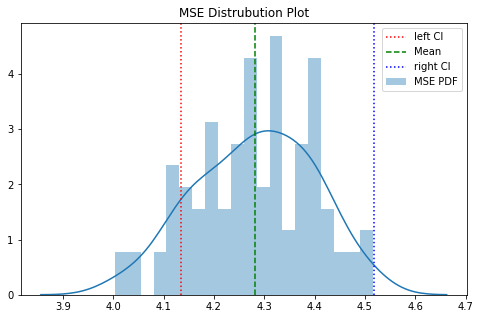

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.distplot(MSE_means, bins=no_of_samples//no_of_bins)
plt.axvline(x=mean_Left_CI, c='red',ls=':')
plt.axvline(x=mean_of_means, c='green',ls='--')
plt.axvline(x=mean_Right_CI, c='blue',ls=':')
plt.legend(['left CI','Mean','right CI','MSE PDF'])
plt.title('MSE Distrubution Plot')
plt.show()

In [89]:
#calculating 95% confidence interval
from prettytable import PrettyTable
OOB_means = []
table = PrettyTable()
table = PrettyTable(["#samples", "Sample Size", "Sample mean", "Sample std","Left C.I","Right C.I"])
for i in range(no_of_samples):
    sample=[OOBs[i] for i in random.choices(range(35),k=10)]
    sample_mean = np.mean(sample)
    OOB_means.append(sample_mean)
    sample_std =  np.std(sample)
    sample_size = len(sample)
    # here we are using sample standard deviation instead of population standard deviation
    left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)
    right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3)
    row = []
    row.append(i+1)
    row.append(sample_size)
    row.append(sample_mean)
    row.append(sample_std)
    row.append(left_limit)
    row.append(right_limit)
    table.add_row(row)
print('======================== Calculation Interval Calculations for OOB =========================')
print(table)

======================== Calculation Interval Calculations for OOB =========================
+----------+-------------+--------------------+--------------------+----------+-----------+
| #samples | Sample Size |    Sample mean     |     Sample std     | Left C.I | Right C.I |
+----------+-------------+--------------------+--------------------+----------+-----------+
|    1     |      10     | 13.38866206701859  | 0.9656467450214259 |  12.778  |   13.999  |
|    2     |      10     | 13.557002864134887 | 1.2528284417704891 |  12.765  |   14.349  |
|    3     |      10     | 13.081887566161026 | 0.828182614621331  |  12.558  |   13.606  |
|    4     |      10     | 13.515853709919885 | 0.8836312444341573 |  12.957  |   14.075  |
|    5     |      10     | 14.122814033902127 | 1.166913529374901  |  13.385  |   14.861  |
|    6     |      10     | 14.337823540413632 | 1.152848503635227  |  13.609  |   15.067  |
|    7     |      10     | 13.220336074296531 | 0.7901342156999115 |  12.721  |

In [90]:
mean_Left_CI = np.mean(left_limit)
mean_Right_CI = np.mean(right_limit)
mean_of_means = np.mean(OOB_means)
print('Mean of Means: ',mean_of_means)
print('Mean Std-Dev : ',np.mean(sample_std))
print('Mean Left CI : ',mean_Left_CI)
print('Mean Right CI: ',mean_Right_CI)

Mean of Means:  13.629408209677884
Mean Std-Dev :  1.0715460936703045
Mean Left CI :  12.62
Mean Right CI:  13.975


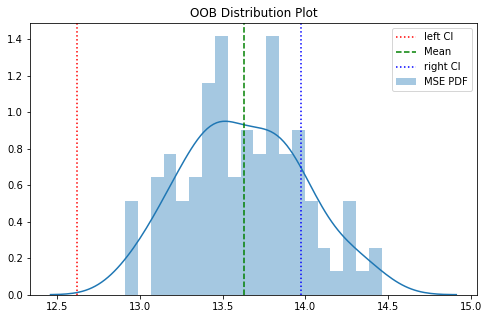

In [91]:
plt.figure(figsize=(8,5))
sns.distplot(OOB_means, bins=no_of_samples//no_of_bins)
plt.axvline(x=mean_Left_CI, c='red',ls=':')
plt.axvline(x=mean_of_means, c='green',ls='--')
plt.axvline(x=mean_Right_CI, c='blue',ls=':')
plt.legend(['left CI','Mean','right CI','MSE PDF'])
plt.title('OOB Distribution Plot')
plt.show()

In [92]:
xq= np.array([0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60])
Y_pred = 0
for i in range(30):
    clf = DecisionTreeRegressor()
    X_train = x[row_indices_iob[i][:,None],col_indices[i]]
    Y_train = y[row_indices_iob[i]]
    clf.fit(X_train,Y_train)
    Y_pred += clf.predict(xq[col_indices[i]].reshape(1,-1)).item()
Y_pred = Y_pred/30

print(Y_pred)

20.503809523809526
